Markov descision process with policy evaluation 
**Markov Decision Process** is defined as a stochastic decision making process which uses a mathematical framework for modelling the decision-making of a dynamic system where the outcomes are either random or under the control of a decision maker (agent). 

A **Markov Decision Process (MDP)** consists of the following components:

- **State Space (S)**: A set of possible states of the system.
- **Actions (A)**: A list of actions the agent can perform.
- **Transition Probability (T)**: This represents the probability of transitioning from one state to another state when an action is performed. 
Transition Probability written as $ P(s' | s, a)$, which is the probability of ending in state $ s' $ after taking an action $ a $ in state $ s $.
- **Reward Function (R)**: The reward attained after transitioning to a new state.
- **Discount Factor ($ \gamma $)**: A value ranging from 0.0 to 1.0 that determines the future rewards compared to immediate rewards.


In [31]:
import numpy as np

class MDP:
    def __init__(self, states, actions, transition_prob, rewards, discount_factor=0.9):
        self.states = states
        self.actions = actions
        self.transition_probs = transition_prob
        self.rewards = rewards
        self.discount_factor = discount_factor
        self.value_table = np.zeros(len(states))  # Initialize value table with zeros
        self.policy = [0] * len(states)           # Initialize policy with zeros

    def policy_evaluation(self, threshold=1e-6):
        iteration = 0
        while True:
            delta = 0
            print(f"Policy Evaluation Iteration {iteration}")
            for s in self.states:
                v = self.value_table[s]
                a = self.policy[s]
                # Compute the value for the chosen action under the current policy
                self.value_table[s] = sum([p * (r + self.discount_factor * self.value_table[s_next])
                                           for p, s_next, r in self.transition_probs[s][a]])
                delta = max(delta, abs(v - self.value_table[s]))
            print(f"Value Table: {self.value_table}\n")
            if delta < threshold:
                break
            iteration += 1

    def policy_improvement(self):
        policy_stable = True
        iteration = 0
        while not policy_stable:
            policy_stable = True
            print(f"Policy Improvement Iteration {iteration}")
            for s in self.states:
                old_action = self.policy[s]
                # Compute action-values for all actions in the state
                action_values = []
                for a in self.actions:
                    action_value = sum([p * (r + self.discount_factor * self.value_table[s_next])
                                        for p, s_next, r in self.transition_probs[s][a]])
                    action_values.append(action_value)
                best_action = np.argmax(action_values)  # Choose the best action based on the action-values
                self.policy[s] = best_action
                if old_action != best_action:
                    policy_stable = False
            print(f"Policy: {self.policy}")
            print(f"Value Table: {self.value_table}\n")
            iteration += 1
        return policy_stable

    def policy_iteration(self):
        iteration = 0
        while True:
            print(f"Policy Iteration {iteration}")
            self.policy_evaluation()
            if self.policy_improvement():
                break
            iteration += 1
        return self.policy, self.value_table

# Define states, actions, transition probabilities, and rewards
states = [0, 1, 2]  # State indices
actions = [0, 1]    # Action indices, e.g., 0 and 1 could represent 'a1' and 'a2'

# Define transition probabilities and rewards
# transition_prob[state][action] = [(probability, next_state, reward), ...]
transition_prob = {
    0: {0: [(0.7, 0, 5), (0.3, 1, 5)], 1: [(1.0, 2, 10)]},
    1: {0: [(0.4, 0, -1), (0.6, 2, -1)], 1: [(1.0, 1, 2)]},
    2: {0: [(1.0, 2, 0)], 1: [(0.5, 0, 3), (0.5, 1, 3)]}
}

# Rewards can be accessed from the transition_probs directly for simplicity.

# Initialize and solve the MDP
mdp = MDP(states, actions, transition_prob, rewards=None)
optimal_policy, value_table = mdp.policy_iteration()

print("Optimal Policy:", optimal_policy)
print("Value Table:", value_table)


Policy Iteration 0
Policy Evaluation Iteration 0
Value Table: [5.  0.8 0. ]

Policy Evaluation Iteration 1
Value Table: [8.366   2.01176 0.     ]

Policy Evaluation Iteration 2
Value Table: [10.8137552   2.89295187  0.        ]

Policy Evaluation Iteration 3
Value Table: [12.59376278  3.5337546   0.        ]

Policy Evaluation Iteration 4
Value Table: [13.88818429  3.99974635  0.        ]

Policy Evaluation Iteration 5
Value Table: [14.82948762  4.33861554  0.        ]

Policy Evaluation Iteration 6
Value Table: [15.5140034   4.58504122  0.        ]

Policy Evaluation Iteration 7
Value Table: [16.01178327  4.76424198  0.        ]

Policy Evaluation Iteration 8
Value Table: [16.37376879  4.89455677  0.        ]

Policy Evaluation Iteration 9
Value Table: [16.63700467  4.98932168  0.        ]

Policy Evaluation Iteration 10
Value Table: [16.82842979  5.05823473  0.        ]

Policy Evaluation Iteration 11
Value Table: [16.96763415  5.10834829  0.        ]

Policy Evaluation Iteration 12


here we see that that the policy iteration remains unchanged i.e converging towards stable states  and the policy does not change 

## implementation of MDP using Grid Based 


In [32]:
import seaborn as sn


In [39]:
class MDP_Grid:
    def __init__(self, grid_size, start_end_states, rewards, discount_factor = 0.8):
        self.grid_size = grid_size # size of environment(grid) NXN
        self.rewards = rewards  # dictionary values (state, action) becomes reward (mapped rewards)
        self.start_end_states = start_end_states
        self.discount_factor = discount_factor # Discount factor for reward balancing
        self.actions = ['down', 'up', 'left', 'right'] # possible actions for the agent
        self.transitioning_probabilities = self.get_transitioning_probabilities() # Method to get the transition probabilities for each state 
        
    def transition_states(self, state, action):
        if action == "up" and state[0] > 0:
            return (state[0] - 1, state[1])
        elif action == "down" and state[0] < self.grid_size - 1:
            return (state[0] + 1, state[1])
        elif action == "left" and state[1] > 0:
            return (state[0], state[1] - 1)
        elif action == "right" and state[1] < self.grid_size - 1:
            return (state[0], state[1] + 1)
        else:
            return state 

    def transition_probabilities(self):
        transition_probabilities = {}
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                transition_probabilities[state] = {}
                for action in self.actions:
                    next_state = self.transition_states(state, action)
                    transition_probabilities[state][action] = [(next_state, 1.0)]
        return transition_probabilities

    def exp_reward(self, state, action):
        return self.rewards.get((state, action), 0)


In [45]:
#calculate action value
def action_val(mdp_class, state, action, value_function):
    transitions = mdp_class.transition_probabilities()[state][action]
    action_value = 0
    for new_state, probability in transitions:
        reward = mdp_class.exp_reward(state, action)
        new_row, new_col = new_state
        action_value += probability * (reward + mdp_class.discount * value_function[new_state[0], new_state[1]])
    return action_value


In [51]:
import matplotlib.pyplot as plt
def getoptimal_policy(mdp_class,value_function):
    optimal_policy={}
    for row in range(mdp_class.grid_size):
        for col in range(mdp_class.grid_size):
            state = (row, col)
            if state in mdp_class.start_end_states:
                continue
            optimal_action_value = float('-inf')
            best_action = None
            for action in mdp_class.actions:
                action_value = action_val(mdp_class, state, action, value_function)
                if action_value > optimal_action_value:
                    optimal_action_value = action_value
                    best_action = action
            optimal_policy[state] = best_action
    return optimal_policy

In [55]:
# Value Iteration Algorithm
def val_iter(mdp_class, convergence_limit=0.001):
    value_function = np.zeros((mdp_class.grid_size, mdp_class.grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for row in range(mdp_class.grid_size):
            for col in range(mdp_class.grid_size):
                now_state = (row, col)
                if now_state in mdp_class.start_end_states:
                    continue

                optimal_action_value = float('-inf')
                for action in mdp_class.actions:
                    action_value = action_val(mdp_class, now_state, action, value_function)
                    optimal_action_value = max(optimal_action_value, action_value)

                new_value_function[row, col] = optimal_action_value
                delta = max(delta, abs(new_value_function[row, col] - value_function[row, col]))

        value_function = new_value_function
        if delta < convergence_limit:
            break

    # Use the renamed function to get the optimal policy
    optimal_policy = getoptimal_policy(mdp_class, value_function)
    return value_function, optimal_policy

In [56]:
def visualize_grid(value_function, optimal_policy, grid_size):
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot value function as a heatmap
    sn.heatmap(value_function, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True, linewidths=0.5, ax=ax)
    
    # Define arrow directions for the optimal policy
    action_arrows = {
        'up': (0, -0.3),
        'down': (0, 0.3),
        'left': (-0.3, 0),
        'right': (0.3, 0)
    }

    # Add arrows for the optimal policy
    for (row, col), action in optimal_policy.items():
        if action in action_arrows:
            dx, dy = action_arrows[action]
            ax.arrow(col + 0.5, row + 0.5, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    # Customize the plot
    ax.set_title("Value Function and Optimal Policy (with arrows)")
    plt.show()


In [59]:
grid_size = 6
start_end_states = [(0, 0), (5,5)]  # Terminal states
reward_map = {
    ((7, 6), 'right'): 1,
    ((7, 7), 'up'): 0,
    ((3, 3), 'down'): 2,
    ((3, 3), 'right'): 1,
    ((3, 4), 'down'): 0
}
discount_factor = 0.9

# Create MDP instance
decision_model = MDP(grid_size, reward_map, start_end_states, discount_factor)

# Run the Value Iteration algorithm
optimal_value_function, optimal_policy =val_iter(decision_model)

# Display results
print("Optimal Value Function:")
print(optimal_value_function)
print("\nOptimal Policy:")
for row in range(grid_size):
    for col in range(grid_size):
        state = (row, col)
        if state in optimal_policy:
            print(f"State ({row}, {col}): {optimal_policy[state]}")
        else:
            print(f"State ({row}, {col}): Terminal")

Optimal Value Function:
[[ 0.          6.21178959  6.90198844  7.66978959  6.90198844  6.21178959]
 [ 6.21178959  6.90198844  7.66978959  8.52198844  7.66978959  6.90198844]
 [ 6.90198844  7.66978959  8.52198844  9.46978959  8.52198844  7.66978959]
 [ 7.66978959  8.52198844  9.46978959 10.52198844  9.46978959  8.52198844]
 [ 6.90198844  7.66978959  8.52198844  9.46978959  8.52198844  7.66978959]
 [ 6.21178959  6.90198844  7.66978959  8.52198844  7.66978959  0.        ]]

Optimal Policy:
State (0, 0): Terminal
State (0, 1): down
State (0, 2): down
State (0, 3): down
State (0, 4): down
State (0, 5): down
State (1, 0): down
State (1, 1): down
State (1, 2): down
State (1, 3): down
State (1, 4): down
State (1, 5): down
State (2, 0): down
State (2, 1): down
State (2, 2): down
State (2, 3): down
State (2, 4): down
State (2, 5): down
State (3, 0): right
State (3, 1): right
State (3, 2): right
State (3, 3): down
State (3, 4): left
State (3, 5): left
State (4, 0): up
State (4, 1): up
State (4, 2

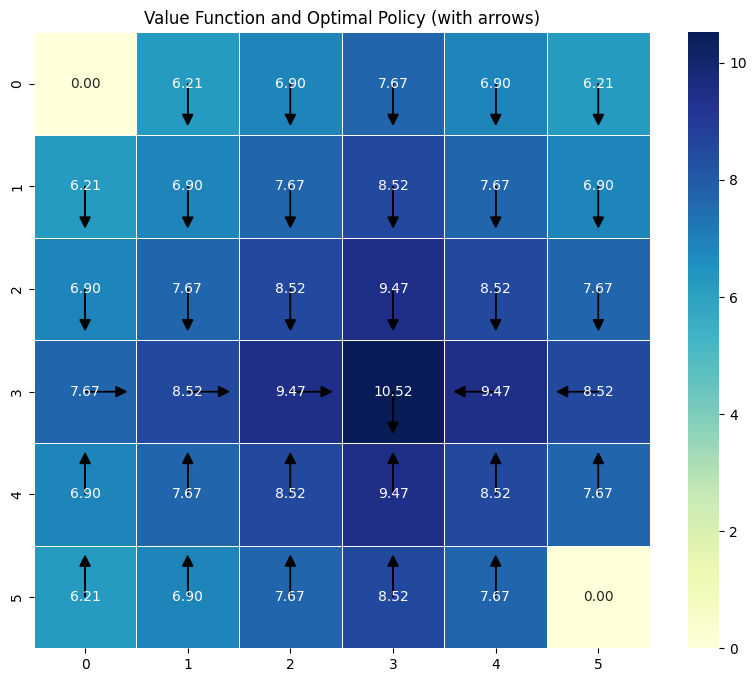

In [60]:
visualize_grid(optimal_value_function, optimal_policy, grid_size)

Iteratively calculates the value function for a given policy, updating state values until the changes between iterations are smaller than the convergence limit.

### Summary of Functions:

1. **`policy_evaluation`**:
   - **Purpose**: Iteratively calculates the value function for a given policy, updating state values until the changes between iterations are smaller than the convergence limit.
   - **Core Idea**: Evaluates how good a given policy is by computing expected state values under the policy.

2. **`policy_improvement`**:
   - **Purpose**: Generates an improved policy by selecting the action with the highest value at each state, based on the current value function.
   - **Core Idea**: Improves the policy by acting greedily with respect to the current value estimates.

3. **`policy_iteration`**:
   - **Purpose**: Repeatedly alternates between policy evaluation and policy improvement until the policy becomes stable (no changes).
   - **Core Idea**: Finds the optimal policy through iterative policy evaluation and improvement.



In [75]:
import numpy as np

class MDP_Grid:
    def __init__(self, grid_size, start_end_states, reward_map, discount_factor):
        self.grid_size = grid_size
        self.start_end_states = start_end_states
        self.reward_map = reward_map
        self.discount = discount_factor
        self.actions = ['up', 'down', 'left', 'right']
        self.terminal_states = start_end_states

    def exp_reward(self, state, action):
        # Return the specified reward if (state, action) is in reward_map, otherwise return 0
        return self.reward_map.get((state, action), 0)

    def transition_probabilities(self):
        # Assuming deterministic transitions (100% probability for moving to the intended direction)
        transition_probs = {}
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                state = (row, col)
                if state in self.terminal_states:
                    continue
                transition_probs[state] = {}
                for action in self.actions:
                    next_state = self.get_next_state(state, action)
                    transition_probs[state][action] = [(next_state, 1.0)]
        return transition_probs

    def get_next_state(self, state, action):
        row, col = state
        if action == 'up' and row > 0:
            return (row - 1, col)
        elif action == 'down' and row < self.grid_size - 1:
            return (row + 1, col)
        elif action == 'left' and col > 0:
            return (row, col - 1)
        elif action == 'right' and col < self.grid_size - 1:
            return (row, col + 1)
        return state  # Return the same state if an action would go out of bounds


def policy_evaluation(mdp_class, policy, convergence_limit=0.001):
    value_function = np.zeros((mdp_class.grid_size, mdp_class.grid_size))

    while True:
        delta = 0
        new_value_function = np.copy(value_function)

        for row in range(mdp_class.grid_size):
            for col in range(mdp_class.grid_size):
                state = (row, col)
                if state in mdp_class.terminal_states:
                    continue

                action = policy[state]
                transitions = mdp_class.transition_probabilities()[state][action]
                state_value = 0
                for new_state, probability in transitions:
                    reward = mdp_class.exp_reward(state, action)
                    state_value += probability * (reward + mdp_class.discount * value_function[new_state[0], new_state[1]])

                new_value_function[row, col] = state_value
                delta = max(delta, abs(state_value - value_function[row, col]))

        value_function = new_value_function
        if delta < convergence_limit:
            break

    return value_function


def policy_improvement(mdp_class, value_function):
    new_policy = {}
    for row in range(mdp_class.grid_size):
        for col in range(mdp_class.grid_size):
            state = (row, col)
            if state in mdp_class.terminal_states:
                continue

            best_action = None
            optimal_action_value = float('-inf')

            for action in mdp_class.actions:
                action_value = 0
                transitions = mdp_class.transition_probabilities()[state][action]
                for new_state, probability in transitions:
                    reward = mdp_class.exp_reward(state, action)
                    action_value += probability * (reward + mdp_class.discount * value_function[new_state[0], new_state[1]])

                if action_value > optimal_action_value:
                    optimal_action_value = action_value
                    best_action = action

            new_policy[state] = best_action

    return new_policy


def policy_iteration(mdp_class, convergence_limit=0.001):
    # Initialize the policy arbitrarily
    policy = { (row, col): 'up' for row in range(mdp_class.grid_size) for col in range(mdp_class.grid_size) }

    while True:
        # Policy evaluation
        value_function = policy_evaluation(mdp_class, policy, convergence_limit)
        
        # Policy improvement
        new_policy = policy_improvement(mdp_class, value_function)

        if new_policy == policy:
            break

        policy = new_policy

    return policy, value_function


# Define grid and rewards
grid_size = 8
start_end_states = [(0, 0), (7, 7)]
reward_map = {
    ((7, 6), 'right'): 1,
    ((6, 6), 'right'): 0.5,
    ((5, 6), 'right'): 0.5,
    ((4, 5), 'right'): 0.3,
    ((4, 4), 'up'): 0.3,
    ((3, 4), 'right'): 1.2,
    ((2, 3), 'down'): -1,
    ((1, 4), 'left'): -1,
    ((5, 2), 'down'): -2,
    ((2, 2), 'right'): -5,
    ((3, 3), 'down'): -3,
    ((5, 5), 'down'): -5,
    ((4, 3), 'right'): -10,
    ((6, 4), 'left'): -10,
    ((3, 3), 'right'): 0,
    ((4, 4), 'down'): 0,
    ((2, 5), 'down'): -1.5,
    ((3, 6), 'down'): -1.5,
    ((6, 7), 'down'): 1.5,
    ((7, 5), 'right'): 1,
}
discount_factor = 0.9

# MDP setup
decision_model = MDP_Grid(grid_size, start_end_states, reward_map, discount_factor)

# Run policy iteration
optimal_policy, final_value_function = policy_iteration(decision_model)

# Display results
print("Optimal Policy:")
for row in range(grid_size):
    for col in range(grid_size):
        state = (row, col)
        if state in optimal_policy:
            print(f"State ({row}, {col}): {optimal_policy[state]}")
        else:
            print(f"State ({row}, {col}): Terminal")


Optimal Policy:
State (0, 0): Terminal
State (0, 1): down
State (0, 2): down
State (0, 3): down
State (0, 4): down
State (0, 5): down
State (0, 6): down
State (0, 7): down
State (1, 0): down
State (1, 1): down
State (1, 2): down
State (1, 3): down
State (1, 4): down
State (1, 5): down
State (1, 6): down
State (1, 7): down
State (2, 0): down
State (2, 1): down
State (2, 2): down
State (2, 3): right
State (2, 4): down
State (2, 5): left
State (2, 6): down
State (2, 7): down
State (3, 0): right
State (3, 1): right
State (3, 2): right
State (3, 3): right
State (3, 4): right
State (3, 5): left
State (3, 6): left
State (3, 7): left
State (4, 0): up
State (4, 1): up
State (4, 2): up
State (4, 3): up
State (4, 4): up
State (4, 5): left
State (4, 6): left
State (4, 7): left
State (5, 0): right
State (5, 1): right
State (5, 2): right
State (5, 3): right
State (5, 4): up
State (5, 5): up
State (5, 6): up
State (5, 7): up
State (6, 0): up
State (6, 1): up
State (6, 2): up
State (6, 3): up
State (6